# Chapter 3. Statistical experiments and significance testing

**Classical statistical inference pipeline:**
1. Formulate hypothesis: 'drug A is better than the existing standard drug' or 'price A is more profitable than the existing price B'
2. Design experiment: an experiment, maybe an A/B test, is designed to test the hypothesis, designed in such a way that it hopefully will deliver conclusive results 
3. Collect data: the data is collected and analyzed, and then a conclusion is drawn
4. Inference and conclusions: Apply the experiment results, which involve a limited set of data, to a larger process or population

## 3.1 A/B testing

**Terminologies**

*Treatment*: something (drug, price, wen headline) to which a subject is exposed

*Treatment group*: a group of subjects exposed to a specific treatment

*Control group*: a group of subjects exposed to no (or standard) treatment 

*Randomization*: the process of randomly assigning subjects to treatments 

*Subjects*: the items (web visitors, patients, etc) that are exposed to treatments 

*Test statistic*: the metric used to measure the effect of the treatment 

**Examples of A/B testings:**

Testing two soil treatments to determine which produces better seed germination

Testing two therapies to determine which suppresses cancer more effectively

Testing two prices to determine which yields more net profit

Testing two web headlines to determine which produced more clicks 

Testing two web ads to determine which generates more conversions 

**Subjects and randomization**

A proper A/B test has subjects that can be assigned to one treatment or another. The subject might be a person, a plant seed, a web visitor. The key is that the subject is exposed to the treatment. Ideally subjects are randomized (assigned randomly) to treatments. In this way, you know that any difference between the treatment groups is due to one of the two things:
1. The effect of the different treatments 
2. Luck of the draw in which subjects are assigned to which treatments (i.e. the random assignment may have resulted in the naturally better-performing subjects being concentrated in A or B)

**Test statistic or metric**

Also need to pay attention to the test statistic or metric that used to compared group A to group B. 

**Binary metric**: Perhaps the most common metric in data science is a binary variable: click or no click, buy nor don't buy, fraud or no fraud, and so on

*Outcome    | Price A | Price B* 

Conversion | 200     | 182 

No conversion | 23,539  |  22,406

**Continuous metric**: like purchase amount, profit, counts, days in hospital, pages visited 

*Outcome         | Price A                     | Price B* 

Revenue/pageview | mean = 3.87, SD = 51.10     | mean = 4.11, SD = 62.98






### Why have a control group?

Without a control group, there is no assurance that 'all other things are equal' and that any difference is really due to the treatment (or to chance). When having a control group, it is subject to the same conditions (except for the treatment of interest) as the treatment group. If simply make a comparison to 'baseline' or prior experience, other factors, besides the treatment, might differ

**Blinding in studies**: A blind study is one in which the subjects are unaware of whether they are getting treatment A or treatment B. Awareness of receiving a particular treatment can affect response. A double-blind study is one in which the investigators and facilitators (e.g. doctors and nurses in a medical study) also are unaware which subjects are getting which treatment. Blinding is not possible when the nature of the treatment is transparent, for example, cognitive therapy from a computer versus a psychologist

**Test statistic and metric**: A/B testing in data science is typically used in a web context. Treatments might be the design of a web page, the price of a product, the wording of a headline, or some other item. Some thought is required to preserve the principles of randomization. Typically the subject in the experiment is the web visitor, and the outcomes we are interested in measuring are clicks, purchases, visit duration, number of pages visited, whether a particular page is visited, and the like. In a standard A/B experiment, you need to decide on one metric ahead of time. Multiple behavior metrics might be collected and be of interest, but if the experiment is expected to lead to a decision between treatment A and the treatment B, a single metric, or test statistic, needs to be established beforehand. Selecting a test statistic after the experiment is conducted opens the door to researcher bias

### Why just A/B? Why not C, D...?

Data scientists are less interested in the question:'Is the difference between price A and price B statistically significant?' than in the question:'Which, out of multiple possible prices, is best?'

Multi-arm bandit 

**Getting permission**: In scientific and medical research involving human subjects, it is typically necessary to get their permission, as well as obtain the approval of an institutional review board. Experiments in business that are done as a part of ongoing operations almost never do this. In most cases(e.g. pricing experiments, or experiments about which headline to show or which offer should be made), this practice is widely accepted. Facebook, however, ran afoul of this general acceptance in 2014 when it experimented with the emotional tone in users’ newsfeeds. Facebook used sentiment analysis to classify newsfeed posts as positive or negative, and then altered the positive/negative balance in what it showed users. Some randomly selected users experienced more positive posts, while others experienced more
negative posts. Facebook found that the users who experienced a more positive newsfeed were more likely to post positively themselves, and vice versa. The magnitude of the effect was small, however, and Facebook faced much criticism for conducting the experiment without users’ knowledge. Some users speculated that Facebook might have pushed some extremely depressed users over the edge if they got the negative version of their feed.

## 3.2 Hypothesis tests

A statistical hypothesis test is further analysis of an A/B test, or any randomized experiment, to assess whether random chance is a reasonable explanation for the observed difference between groups A and B

### The null hypothesis

**Hypothesis testing Logic**: Hypothesis tests use the following logic: Given the human tendency to react to unusual but random behavior and interpret it as something meaningful and real, in our experiments we will require proof that the difference between groups is more extreme than what chance might reasonably product. This involves a baseline assumption that the treatments are equivalent, and any difference between the groups is due to chance. This baseline assumption is termed the null hypothesis. Our hope, then, is that we can in fact prove the null hypothesis wrong and show that the outcomes for groups A and B are more different than what chance might produce

One way to do this is via a resampling permutation procedure, in which we shuffle together the results from groups A and B and then repeatedly deal out the data in groups of similar sizes, and then observe how often we get a difference as extreme as the observed difference. The combined shuffled results from groups A and B, and the procedure of resampling from them, embodies the null hypothesis of groups A and B being equivalent and interchangeable and is termed the null model.

### Alternative hypothesis

The null and alternative hypotheses must account for all possibilities

Examples:
1. Null = “no difference between the means of group A and group B”; alternative = “A is different from B” (could be bigger or smaller)
2. Null = “A ≤ B”; alternative = “A > B”
3. Null = “B is not X% greater than A”; alternative = “B is X% greater than A”

### One-way versus two-way hypothesis tests

**One-way / One-tail**: Often in an A/B test, you are testing a new option (say, B) against an established default option (A), and the presumption is that you will stick with the default option unless the new option proves itself definitively better. In such a case, you want a hypothesis test to protect you from being fooled by chance in the direction favoring B. You don’t care about being fooled by chance in the other direction, because you would be sticking with A unless B proves definitively better. So you want a directional alternative hypothesis (B is better than A). In such a case, you use a one-way (or one-tail) hypothesis test. This means that extreme chance results in only one direction count toward the p-value. A one-tail hypothesis test often fits the nature of A/B decision making, in which a decision is required and one option is typically assigned “default” status unless the other proves better.

**Two-way / Two-tail**: If you want a hypothesis test to protect you from being fooled by chance in either direction, the alternative hypothesis is bidirectional (A is different from B; could be bigger or smaller). In such a case, you use a two-way (or two-tail) hypothesis. This means that extreme chance results in either direction count toward the p-value.

## 3.3 Resampling

**Definition**: Resampling in statistic means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. It can also be used to assess and improve the accuracy of some machine-learning models (e.g. the predictions from decision tree models built on multiple bootstrapped data sets can be averaged in a process known as bagging)

**Types**: 
1. Bootstrap: assess the reliability of an estimate
2. Permutation tests: used to test hypotheses, typically involving two or more groups

### Permutation test

**Definition**: The procedure of combining two or more samples together and randomly (or exhaustively) reallocating the observations to resamples 

In a permutation procedure, two or more samples are involved, typically the groups in an A/B or other hypothesis test. Permute means to change the order of a set of values. The first step in a permutation test of a hypothesis is to combine the results from groups A and b (and if used, C, D ...). This is the logical embodiment of the null hypothesis that the null hypothesis that the treatments to which the groups were exposed do not differ. We then test that hypothesis by randomly drawing groups from this combined set and seeing how much they differ from one another

**Permutation procedure**:
1. Combine the results from the different groups into a single data set
2. Shuffle the combined data and then randomly draw (without replacement) a resample of the same size as group A (clearly it will contain some data from the other groups)
3. From the remaining data, randomly draw (without replacement) a resample of the same size as group B
4. Do the same for groups C, D and so on. You have now collected one set of resamples that mirror the sizes of the original samples 
5. Whatever statistic or estimate was calculated for the original samples (e.g. difference in group proportions), calculate it now for the resamples, and record, this constitutes one permutation iteration
6. Repeat the previous steps R times to yield a permutation distribution of the test statistic

Now go back to the observed difference between groups and compare it to the set of permuted differences. If the observed difference lies well within the set of permuted differences, then we have not proven anything, the observed difference is within the range of what chance might produce. However, if the observed difference lies outside most of the permutation distribution, then we conclude that chance is not responsible. In technical terms, the difference is statistically significant

### Example: web stickiness

A company selling a relatively high-value service wants to test which of two web presentations does a better selling job. Due to the high value of the service being sold, sales are infrequent and the sales cycle is lengthy. It would take too long to accumulate enough sales to know which presentation is superior. So the company decides to measure the results with a proxy variable, using the detailed interior page that describes the service

A proxy variable is one that stands in for the true variable of interest, which may be unavailable, too costly, or too time-consuming to measure. In climate research, for example, the oxygen content of ancient ice cores is used as a proxy for temperature. It is useful to have at least some data on the true variable of interest, so the strength of its association with the proxy can be assessed

One potential proxy variable for our company is the number of clicks on the detailed landing page. A better one is how long people spend on the page. It is reasonable to think that a web presentation (page) that holds people's attention longer will lead to more sales. Hence, our metric is average session time, comparing page A to page B

Due to the fact that this is an interior, special-purpose page, it does not receive a huge number of visitors. Also note that Google Analytics, which is how we measure session time, cannot measure session time for the last session a person visits. Instead of deleting that session from the data, though, Google Analytics records it as a zero, so the data requires additional processing to remove those sessions. 

The result is a total of 36 sessions for the two different presentations, 21 for page A and 15 for page B

In [13]:
import pandas as pd
session_times = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/web_page_data.csv')
session_times.Time = 100 * session_times.Time
session_times

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


In [14]:
session_times.Page.value_counts()

Page A    21
Page B    15
Name: Page, dtype: int64

Text(0.5, 0.98, '')

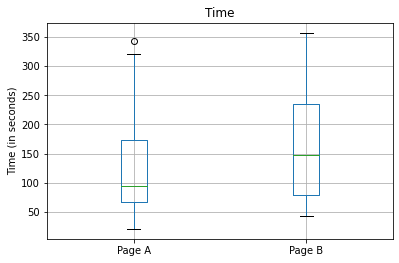

In [15]:
import matplotlib.pyplot as plt
ax = session_times.boxplot(by = 'Page', column = 'Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [16]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b, mean_a, mean_b - mean_a)

162.0 126.33333333333333 35.66666666666667


Page B has session times that are greater than those of page A by 35.67 seconds, on average. The question is whether this difference is within the range of what random chance might produce, i.e., is statistically significant. One way to answer this is to apply a permutation test, combine all the session times together and then repeatedly shuffle and divide them into groups of 21 (nA = 21 for page A) and 15 (nB = 15 for page B)

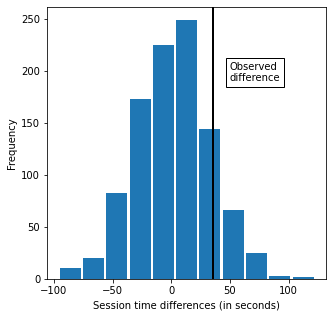

In [21]:
import random 

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]

perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = mean_b - mean_a, color = 'black', lw = 2)
ax.text(50, 190, 'Observed\ndifference', bbox = {'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')
plt.show()

In [24]:
import numpy as np
np.mean(perm_diffs > mean_b - mean_a)

0.132

This suggests that the observed difference in session time between page A and page B is well within the range of chance variation and thus is not statistically significant

### Exhaustive and bootstrap permutation tests

**Random permutation test**

**Exhaustive permutation test**: instead of just randomly shuffling and dividing the data, we actually figure out all the possible ways it could be divided. This is particular only for relatively small sample sizes. With a large number of repeated shufflings, the random permutation test results approximate those of the exhaustive permutation test, and approach them in the limit. Exhaustive permutation tests are also sometimes called exact tests, due to their statistical property of guaranteeing that the null model will not test as 'significant' more than the alpha level of the test

**Bootstrap permutation test**: the draws outlines in steps 2 and 3 of the random permutation test are made with replacement instead of without replacement. In this way the resampling procedure models not just the random element in the assignment of treatment to subject but also the random element in the selection of subjects from a population. Both procedures are encountered in statistics, and the distinction between them is somewhat convoluted and not of consequence in the practice of data science

### Permutation tests: the bottom line for data science

Permutation tests are useful heuristic procedures for exploring the role of random variation. They are relatively easy to code, interpret, and explain, and they offer a useful detour around the formalism and 'false determinism' of formula-based statistics, in which the precision of formula answers tends to imply unwarranted certainty

One virtue of resampling, in contrast to formula approaches, is that it comes much closer to a one-size-fits-all approach to inference. Data can be numeric or binary. Sample sizes can be the same or different. Assumptions about normally distributed data are not needed

## 3.4 Statistical significance and p-values

Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce. If the result is beyond the realm of chance variation, it is said to be statistically significant

**p-value**: Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results

**Alpha**: The probability threshold of 'unusualness' that chance results must surpass for actual outcomes to be deemed statistically significant

**Type 1 error**: Mistakenly concluding an effect is real (when it is due to chance)

**Type 2 error**: Mistakenly concluding an effect is due to chance (when it is real)

**Example**:

Outcome | Price A | Price B

Conversion | 200 | 182

No conversion | 23,539 | 22,406

Price A converts almost 5% better than price B (0.8425% = 200/(23539+200)x100, versus 0.8057% = 182/(22406+182)x100 — a difference of 0.0368 percentage points)

Test whether the difference in conversions between prices A and B is within the range of chance variation, using a resampling procedure. By chance variation, we mean the random variation produced by a probability model that embodies the null hypothesis that there is no difference between the rates. The permutation procedure asks: If the two prices share the same conversion rate, could chance variation produce a difference as big as 5%?

1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conversion rate of 382 ones and 45,945 zeros = 0.008246 = 0.8246%
2. Shuffle and draw out a resample of size 23,739 (same n as price A), and record how many 1s
3. Record the number of 1s in the remaining 22,588 (same n as price B)
4. Record the difference in proportion of 1s
5. Repeat steps 2-4
6. How often was the difference >= 0.0368?

In [29]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')

Observed difference: 0.0368%


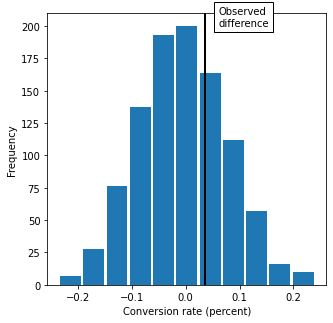

In [32]:
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = obs_pct_diff, color = 'black', lw = 2)
ax.text(0.06, 200, 'Observed\ndifference', bbox = {'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')
plt.show()

In this case the observed difference of 0.0368% is well within the range of chance variation

### p-value

Simply looking at the graph is not a very precise way to measure statistical significance, so of more interest is the p-value. This is the frequency with which the chance model produces a result more extreme than the observed result. We can estimate a p-value that the permutation test produces a difference equal to or greater than the observed difference

In [40]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.323

True is interpreted as 1 and false as 0

The p-value is 0.308, which means that we would expect to achieve a result as extreme as this, or a more extreme results, by random chance over 30% of the time

In this case, we didn't need to use a permutation test to get a p-value. Since we have a binomial distribution, we can approximate the p-value

In [45]:
from scipy import stats
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = scipy.stats.chi2_contingency(survivors)
print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


The normal approximation yields a p-value of 0.3498, which is close to the p-value obtained from the permutation test

### Alpha

A threshold is specified in advance, as in 'more extreme than 5% of the chance (null hypothesis) results', this threshold is know as alpha

Typical alpha levels are 5% and 1%. Any chosen level is an arbitrary decision, there is nothing about the process that will guarantee correct decisions x% of the time. This is because the probability question being answered is not 'What is the probability that this happened by chance?' but rather 'Given a chance model, what is the probability of a result this extreme?'. We then deduce backward about the appropriateness of the chance model, but that judgment does not carry a probability

**p-value controversy**

Wrong: The probability that the result is due to chance

Right: The probability that, given a chance model, results as extreme as the observed results could occur

**p-value principles**
1. p-values can indicate how incompatible the data are with a specified statistical model
2. p-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone
3. Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold
4. Proper inference requires full reporting and transparency
5. A p-value, or statistical significance, does not measure the size of an effect or the importance of a result 
6. By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis

**practical significance**

Even if a result is statistically significant, that does not mean it has practical significance. A small difference that has no practical meaning can be statistically significant if it arose from large enough samples. Large samples ensure that small, non-meaningful effects can nonetheless be big enough to rule out chance as an explanation. Ruling out chance does not magically render importance a result that is, in its essence, unimportant

### Type 1 and type 2 errors

A type 1 error, in which you mistakenly conclude an effect is real, when it is really just due to chance

A type 2 error, in which you mistakenly conclude that an effect is not real (i.e. due to chance), when it actually is real

Actually, a type 2 error is not so much an error as a judgment that the sample size is too small to detect the effect. When a p-value falls short of statistical significance (e.g. it exceeds 5%), what we are really saying is 'effect not proven'. It could be that a larger sample would yield a smaller p-value

The basic function of significance tests or hypothesis tests is to protect against being fooled by random chance, thus they are typically structured to minimize type 1 errors

### Data science and p-values

For a data scientist, a p-value is a useful metric in situations where you want to know whether a model result that appears interesting and useful is within the range of normal chance variability. As a decision tool in an experiment, a p-value should not be considered controlling, but merely another point of information bearing on a decision. For example, p-values are sometimes used as intermediate inputs in some statistical or machine learning models - a feature might be included in or excluded from a model depending on its p-value

## 3.5 t-Tests

There are numerous types of significance tests, depending on whether the data comprises count data or measured data, how many samples there are, and what's being measured. A very common one is the t-test, named after Student's t-distribution to approximate the distribution of a single sample mean

**t-statistic**: a standardized version of common test statistics such as means

**t-distribution**: a reference distribution (in this case derived from the null hypothesis), to which the observed t-statistic can be compared

All significance tests require that you specify a test statistic / metric to measure the effect you are interested in and help you determine whether that observed effect lies within the range of normal chance variation. In a resampling test or permutation test, the scale of the data does not matter. You create the reference (null hypothesis) distribution from the data itself and use the test statistic as is

In the 1920s and 1930s, when statistical hypothesis testing was being developed, it was not feasible to randomly shuffle data thousands of times to do a resampling test. Statisticians found that a good approximation to the permutation (shuffled) distribution was the t-test, based on Gosset’s t-distribution. It is used for the very common two-sample comparison—A/B test—in which the data is numeric. But in order for the t-distribution to be used without regard to scale, a standardized form of the test statistic must be used.

In [46]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var = False)
print(f'p-value for single sided test: {res.pvalue /2:.4f}')

p-value for single sided test: 0.1408


The alternative hypothesis is that the session time mean for page A is less than that for page B. The p-value of 0.1408 is fairly close to the permutation test p-values

In a resampling mode, we structure the solution to reflect the observed data and the hypothesis to be tested, not worrying about whether the data is numeric or binary, whether or not sample sizes are balanced, sample variances, or a variety of other factors.

In the formula world, many variations present themselves, and they can be bewildering. Statisticians need to navigate that world and learn its map, but data scientists do not, they are typically not in the business of sweating the details of hypothesis tests and confidence intervals the way a researcher preparing a paper for presentation might

Before the advent of computers, resampling tests were not practical, and statisticians used standard reference distributions

## 3.6 Multiple testing

'Torture the data long enough and it will confess'. If you look at the data through enough different perspectives and ask enough questions, you almost invariably will find a statistically significant effect

For example, if you have 20 predictor variables and one outcome variable, all randomly generated, the odds are pretty good that at least one predictor will (falsely) turn out to be statistically significant if you do a series of 20 significance tests at the alpha = 0.05 level. As previously discussed, this is called a Type 1 error. You can calculate this probability by first finding the probability that all will correctly test nonsignificant at the 0.05 level. The probability that one will correctly test nonsignificant is 0.95, so the probability that all 20 will correctly test nonsignificant is 0.95 × 0.95 × 0.95…, or 0.95 = 0.36. The probability that at least one predictor will (falsely) test significant is the flip side of this probability, or 1 – (probability that all will be nonsignificant) = 0.64. This is known as alpha inflation.

This issue is related to the problem of overfitting in data mining, or “fitting the model to the noise.” The more variables you add, or the more models you run, the greater the probability that something will emerge as “significant” just by chance.

In supervised learning tasks, a holdout set where models are assessed on data that the model has not seen before mitigates this risk. In statistical and machine learning tasks not involving a labeled holdout set, the risk of reaching conclusions based on statistical noise persists.

**Multiplicity adjustment**: Adjustment procedures in statistics can compensate for this by setting the bar for statistical significance more stringently than it would be set for a single hypothesis test. These adjustment procedures typically involve “dividing up the alpha” according to the number of tests. This results in a smaller alpha (i.e., a more stringent bar for statistical significance) for each test. One such procedure, the Bonferroni adjustment, simply divides the alpha by the number of comparisons. Another, used in comparing multiple group means, is Tukey’s “honest significant difference,” or Tukey’s HSD. This test applies to the maximum difference among group means, comparing it to a benchmark based on the t-distribution (roughly equivalent to shuffling all the values together, dealing out resampled groups of the same sizes as the original groups, and finding the maximum difference among the resampled group means)

**Causes and issues**: 
Multiplicity in a research study or data mining project (multiple comparisons, many variables, many models, etc) increases the risk of concluding that something is significant just by chance
1. Checking for multiple pairwise differences across groups 
2. Looking at multiple subgroup results (we found no significant treatment effect overall, but we did find an effect for unmarried women younger than 30)
3. Trying lost of statistical models 
4. Including lots of variables in models 
5. Asking a number of different questions (i.e. different possible outcomes)

**False discovery rate**: Across multiple tests, the rate of making a type 1 error. The term false discovery rate was originally used to describe the rate at which a given set of hypothesis tests would falsely identify a significant effect. It became particularly useful with the advent of genomic research, in which massive numbers of statistical tests might be conducted as part of a gene sequencing project. In these cases, the term applies to the testing protocol, and a single false “discovery” refers to the outcome of a hypothesis test (e.g., between two samples). Researchers sought to set the parameters of the testing process to control the false discovery rate at a specified level. The term has also been used for classification in data mining; it is the misclassification rate within the class 1 predictions. Or, put another way, it is the probability that a “discovery” (labeling a record as a “1”) is false. Here we typically are dealing with the case where 0s are abundant and 1s are interesting and rare

**The bottom line for data scientists on multiplicity**:
1. For predictive modeling, the risk of getting an illusory model whose apparent efficacy is largely a product of random chance is mitigated by cross-validation and use of a holdout sample 
2. For other procedures without a labeled holdout set to check the model, you must rely on: Awareness that the more you query and manipulate the data, the greater the role that chance might play. Resampling and simulation heuristics to provide random chance benchmarks against which observed results can be compared

## 3.7 Degrees of freedom

**Definition of d.f.**: The concept is applied to statistics calculated from sample data, and refers to the number of values free to vary. For example, if you know the mean for a sample of 10 values, there are 9 degrees of freedom (once you know 9 of the sample values, the 10th can be calculated and is not free to vary). The degree of freedom parameter, as applied to many probability distributions, affects the shape of the distribution

The number of degrees of freedom is an input to many statistical tests. For example, degrees of freedom is the name given to the n – 1 denominator seen in the calculations for variance and standard deviation. Why does it matter? When you use a sample to estimate the variance for a population, you will end up with an estimate that is slightly biased downward if you use n in the denominator. If you use n – 1 in the denominator, the estimate will be free of that bias.

**d.f. and data science**: Is it important for data science? Not really, at least in the context of significance testing. For one thing, formal statistical tests are used only sparingly in data science. For another, the data size is usually large enough that it rarely makes a real difference for a data scientist whether, for example, the denominator has n or n-1. As n gets large, the bias that would come from using n in the denominator disappears

**d.f. and data science relationship**: There is one context, though, in which it is relevant: the use of factored variables in regression (including logistic regression). Some regression algorithms choke if exactly redundant predictor variables are present. This most commonly occurs when factoring categorical variables into binary indicators (dummies). Consider the variable 'day of week'. Although there are seven days of the week, there are only six degrees of freedom in specifying day of week. For example, once you know that day of week is not Monday through Saturday, you know it must be Sunday. Inclusion of the Mon-Sat indicators thus means that also including Sunday would cause the regression to fail, due to a multicollinearity error

The concept of degrees of freedom lies behind the factoring of categorical variables into n-1 indicator or dummy variables when doing a regression (to avoid multicollinearity)

## 3.8 ANOVA

**Definition**: Suppose that, instead of an A/B test, we had a comparison of multiple groups, say A/B/C/D, each with numeric data. The statistical procedure that tests for a statistically significant difference among the groups is called analysis of variance, or ANOVA

Pairwise comparison: A hypothesis test (e.g. of means) between two groups among multiple groups

Omnibus test: A single hypothesis test of the overall variance among multiple group means

Decomposition of variance: separation of components contributing to an individual value (e.g. from the overall average, from a treatment mean, and from a residual error)

F-statistic: a standardized statistic that measures the extent to which differences among group means exceed what might be expected in a chance model

SS: Sum of squares, referring to deviations from some average value

**Example**:

Page 1 Page 2 Page 3 Page 4

164 178 175 155

172 191 193 166

177 182 171 164

156 185 163 170

195 177 176 168

Average 172 185 176 162

Grand average 173.75

The more pairwise comparisons we make, the greater the potential for being fooled by random chance. Instead of worrying about all the different comparisons between individual pages we could possibly make, we can do a single overall test that addresses the question: 'Could all the pages have the same underlying stickiness, and the differences among them be due to the random way in which a common set of session times got allocated among the four pages?'

The procedure used to test this is ANOVA. The procedure for the resampling (specified for the A/B/C/D test of web page stickiness):
1. Combine all the data together in a single box
2. Shuffle and draw out four resamples of five values each
3. record the mean of each of the four groups 
4. Record the variance among the four group means
5. Repeat steps 2-4 many (say 1000) times

What proportion of the time did the resampled variance exceed the observed variance? This is the p-value

The p-value is 0.09278, in other words, given the same underlying stickiness, 9.3% of the time the response rate among four pages might differ as much as was actually observed, just by chance. This degree of improbability falls short of the traditional statistical threshold of 5%, so we conclude that the difference among the dour pages could have arisen by chance

In [47]:
four_sessions = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/four_sessions.csv')
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


In [52]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655


In [57]:
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Pr(Prob) 0.08


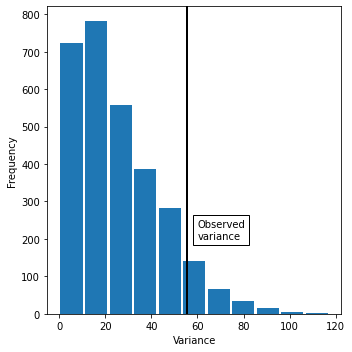

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### F-statistic

Just like the t-test can be used instead of a permutation test for comparing the mean of two groups, there is a statistical test for ANOVA based on the F-statistic. The F-statistic is based on the ratio of the variance across group means (i.e. the treatment effect) to the variance due to residual error. The higher this ratio, the more statistically significant the result. If the data follows a normal distribution, then statistical theory dictates that the statistic should have a certain distribution. Based on this, it is possible to compute a p-value

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

model = smf.ols('Time ~ Page', data = four_sessions).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


Df is “degrees of freedom,” Sum Sq is “sum of squares,” Mean Sq is “mean squares” (short for mean-squared deviations), and F value is the F-statistic. For the grand average, sum of squares is the departure of the grand average from 0, squared, times 20 (the number of observations). The degrees of freedom for the grand average is 1, by definition

For the treatment means, the degrees of freedom is 3 (once three values are set, and then the grand average is set, the other treatment mean cannot vary). Sum of squares for the treatment means is the sum of squared departures between the treatment means and the grand average

For the residuals, degrees of freedom is 20 (all observations can vary), and SS is the sum of squared difference between the individual observations and the treatment means. Mean squares (MS) is the sum of squares divided by the degrees of freedom

The F-statistic is MS(treatment) / MS(error). The F value thus depends only on this ratio and can be compared to a standard F-distribution to determine whether the differences among treatment means are greater than would be expected in random chance variation

**Decomposition of variance**:

Observed values in a data set can be considered sums of different components. For any observed data value within a data set, we can break it down into the grand average, the treatment effect, and the residual error. We call this a decomposition of variance

1. Start with grand average (173.75 for web page stickiness data)
2. Add treatment effect, which might be negative (independent variable = web page)
3. Add residual error, which might be negative

Thus the decomposition of the variance for the top-left value in the A/B/C/D test table is as follows:

1. Start with grand average: 173.75
2. Add treatment (group) effect: -1.75 (172 - 173.75)
3. Add residual: -8 (164 - 172)
4. Equals: 164

### Two-way ANOVA

The A/B/C/D test just described is a 'one-way' AVOVA, in which we have one factor (group) that is varying. We could have a second factor involved - say, 'weekend versus weekday' - with data collected on each combination (group A weekend, group A weekday, group B weekend, etc). This would be a 'two-way ANOVA' and we would handle it in similar fashion to the one-way ANOVA by identifying the 'interaction effect'. After identifying the grand average effect and the treatment effect, we then separate the weekend and weekday observations for each group and find the difference between the averages for those subsets and the treatment average

You can see that ANOVA and then two-way ANOVA are the first steps on the road toward a full statistical model, such as regression and logistic regression, in which multiple factors and their effects can be modeled

**Key ideas**:
1. ANOVA is a statistical procedure for analyzing the results of an experiment with multiple groups 
2. It is the extension of similar procedures for A/B test, used to assess whether the overall variation among groups is within the range of chance variation
3. A useful outcome of ANOVA is the identification of variance components associated with group treatments, interaction effects, and errors

## 3.9 Chi-square test

**Chi-square statistic**: a measure of the extent to which some observed data departs from expectation

**Expectation or expected**: How we would expect the data to turn out under some assumption, typically the null hypothesis

Web testing often goes beyond A/B testing and tests multiple treatments at once. The chi-square test is used with count data to test how well it firs some expected distribution. The most common use of the chi-square statistic in statistical practice is with r x c (rows by columns) contingency table, to assess whether the null hypothesis of independence among variables is reasonable

### Chi-square test: a resampling approach

**Example**: 

Web testing results for three different headlines:

Headline A | Headline B | Headline C

Click | 14 | 8 | 12

No-click | 986 | 992 | 988


Expected if all three headlines have the same click rate (null hypothesis):

Headline A | Headline B | Headline C

Click | 11.33 | 11.33 | 11.33

No-click | 988.67 | 988.67 | 988.67

**Pearson residual**: 

R = (Observed - Expected) / √Expected

Pearson residuals:

Headline A | Headline B | Headline C

Click | 0.792 | –0.990 | 0.198

No-click | –0.085 | 0.106 | –0.021

**chi-square statistic**: the sum of the squared Pearson residuals

X = sum(R^2)

**Resampling algorithm**:

1. Constitute a box with 34 ones (clicks) and 2966 zeros (no clicks)
2. Shuffle, take three separate samples of 1000, and count the clicks in each
3. Find the squared differences between the shuffled counts and the expected counts and sum them
4. Repeat steps 2 and 3, say, 1000 times 
5. How often does the resampled sum of squared deviations exceed the observed? That is the p-value

In [64]:
click_rate = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/click_rates.csv')
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


In [65]:
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in row])
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)

print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4885


### Chi-square test: statistical theory

Asymptotic statistical theory shows that the distribution of the chi-square statistic can be approximated by a chi-square distribution. The appropriate standard chi-square distribution is determined by the degrees of freedom. For a contingency table, the degrees of freedom are related to the number of rows (r) and columns (c) as follows: 

degrees of freedom = (r − 1) × (c − 1)

The chi-square distribution is typically skewed, with a long tail to the right. The further out on the chi-square distribution the observed statistic is, the lower the p-value

In [66]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


The p-value is a little less than the resampling p-value; this is because the chi-square distribution is only an approximation of the actual distribution of the statistic

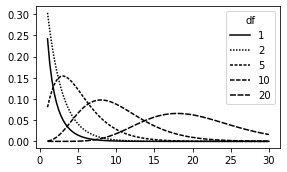

In [67]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

### Fisher's exact test

The chi-square distribution is a good approximation of the shuffled resampling test just described, except when counts are extremely low (single digits, especially five or fewer). In such cases, the resampling procedure will yield more accurate p-values.

In fact, most statistical software has a procedure to actually enumerate all the possible rearrangements (permutations) that can occur, tabulate their frequencies, and determine exactly how extreme the observed result is. This is called Fisher’s exact test

The p-value is very close to the p-value obtained using the resampling method

Where some counts are very low but others are quite high (e.g., the denominator in a conversion rate), it may be necessary to do a shuffled permutation test instead of a full exact test, due to the difficulty of calculating all possible permutations.

There is no implementation of Fisher’s exact test easily available in Python

In [69]:
# stats.fisher_exact(clicks.values)

### Relevance for data science

**Multi-armed bandit**: The chi-square test, or Fisher’s exact test, is used when you want to know whether an effect is for real or might be the product of chance. In most classical statistical applications of the chi-square test, its role is to establish statistical significance, which is typically needed before a study or an experiment can be published. This is not so important for data scientists. In most data science experiments, whether A/B or A/B/C…, the goal is not simply to establish statistical significance but rather to arrive at the best treatment. For this purpose, multi-armed bandits offer a more complete solution.

**Power and sample size calculation**: One data science application of the chi-square test, especially Fisher’s exact version, is in determining appropriate sample sizes for web experiments. These experiments often have very low click rates, and despite thousands of exposures, count rates might be too small to yield definitive conclusions in an experiment. In such cases, Fisher’s exact test, the chi-square test, and other tests can be useful as a component of power and sample size calculations

Chi-square tests are used widely in research by investigators in search of the elusive statistically significant p-value that will allow publication. Chi-square tests, or similar resampling simulations, are used in data science applications more as a filter to determine whether an effect or a feature is worthy of further consideration than as a formal test of significance

For example, they are used in spatial statistics and mapping to determine whether spatial data conforms to a specified null distribution (e.g., are crimes concentrated in a certain area to a greater degree than random chance would allow?). They can also be used in automated feature selection in machine learning, to assess class prevalence across features and identify features where the prevalence of a certain class is unusually high or low, in a way that is not compatible with random variation.

## 3.10 Multi-arm bandit algorithm

Multi-arm bandits offer an approach to testing, especially web testing, that allows explicit optimization and more rapid decision making than the traditional statistical approach to designing experiments

A traditional A/B test involves data collected in an experiment, according to a specified design, to answer a specific question such as, “Which is better, treatment A or treatment B?” The presumption is that once we get an answer to that question, the experimenting is over and we proceed to act on the results

You can probably perceive several difficulties with that approach. 
1. Our answer may be inconclusive: “effect not proven.” In other words, the results from the experiment may suggest an effect, but if there is an effect, we don’t have a big enough sample to prove it (to the satisfaction of the traditional statistical standards). What decision do we take?
2. We might want to begin taking advantage of results that come in prior to the conclusion of the experiment
3. We might want the right to change our minds or to try something different based on additional data that comes in after the experiment is over. The traditional approach to experiments and hypothesis tests dates from the 1920s and is rather inflexible. The advent of computer power and software has enabled more powerful flexible approaches. Moreover, data science (and business in general) is not so worried about statistical significance, but concerned more with optimizing overall effort and results.

Bandit algorithms, which are very popular in web testing, allow you to test multiple treatments at once and reach conclusions faster than traditional statistical designs. They take their name from slot machines used in gambling, also termed one-armed bandits (since they are configured in such a way that they extract money from the gambler in a steady flow). If you imagine a slot machine with more than one arm, each arm paying out at a different rate, you would have a multi-armed bandit, which is the full name for this algorithm.

Your goal is to win as much money as possible and, more specifically, to identify and  settle on the winning arm sooner rather than later. The challenge is that you don’t know at what overall rate the arms pay out—you only know the results of individual pulls on the arms. Suppose each “win” is for the same amount, no matter which arm. What differs is the probability of a win. Suppose further that you initially try each arm 50 times and get the following results

Arm A: 10 wins out of 50

Arm B: 2 win out of 50

Arm C: 4 wins out of 50

One extreme approach is to say, “Looks like arm A is a winner—let’s quit trying the other arms and stick with A.” This takes full advantage of the information from the initial trial. If A is truly superior, we get the benefit of that early on. On the other hand, if B or C is truly better, we lose any opportunity to discover that. Another extreme approach is to say, “This all looks to be within the realm of chance—let’s keep pulling them all equally.” This gives maximum opportunity for alternates to A to show themselves. However, in the process, we are deploying what seem to be inferior treatments. How long do we permit that? Bandit algorithms take a hybrid approach: we start pulling A more often, to take advantage of its apparent superiority, but we don’t abandon B and C. We just pull them less often. If A continues to outperform, we continue to shift resources (pulls) away from B and C and pull A more often. If, on the other hand, C starts to do better, and A starts to do worse, we can shift pulls from A back to C. If one of them turns out to be superior to A and this was hidden in the initial trial due to chance, it now has an opportunity to emerge with furthern testing.

Now think of applying this to web testing. Instead of multiple slot machine arms, you might have multiple offers, headlines, colors, and so on being tested on a website. Customers either click (a “win” for the merchant) or don’t click. Initially, the offers are shown randomly and equally. If, however, one offer starts to outperform the others, it can be shown (“pulled”) more often. But what should the parameters of the algorithm that modifies the pull rates be? What “pull rates” should we change to, and when should we change?

**Epsilon-greedy algorithm for an A/B test**:

1. Generate a uniformly distributed random number between 0 and 1
2. If the number lies between 0 and epsilon (where epsilon is a number between 0 and 1, typically fairly small), flip a fair coin (50/50 probability), and: If the coin is heads, show offer A, if the coin is tails, show offer B
3. If the number is >= epsilon, show whichever offer has had the highest response rate to date

Epsilon is the single parameter that governs this algorithm. If epsilon is 1, we end up with a standard simple A/B experiment (random allocation between A and B for each subject). If epsilon is 0, we end up with a purely greedy algorithm—one that chooses the best available immediate option (a local optimum). It seeks no further experimentation, simply assigning subjects (web visitors) to the best-performing treatment.

**Thompson’s sampling**: A more sophisticated algorithm uses “Thompson’s sampling.” This procedure “samples” (pulls a bandit arm) at each stage to maximize the probability of choosing the best arm. Of course you don’t know which is the best arm—that’s the whole problem!—but as you observe the payoff with each successive draw, you gain more information. Thompson’s sampling uses a Bayesian approach: some prior distribution of rewards is assumed initially, using what is called a beta distribution (this is a common mechanism for specifying prior information in a Bayesian problem). As information accumulates from each draw, this information can be updated, allowing the selection of the next draw to be better optimized as far as choosing the right arm.

Bandit algorithms can efficiently handle 3+ treatments and move toward optimal selection of the “best.” For traditional statistical testing procedures, the complexity of decision making for 3+ treatments far outstrips that of the traditional A/B test, and the advantage of bandit algorithms is much greater.

## 3.11 Power and sample size

**Effect size**: The minimum size of the effect that you hope to be able to detect in a statistical test, such as “a 20% improvement in click rates.”

**Power**: The probability of detecting a given effect size with a given sample size

**Significance level**: The statistical significance level at which the test will be conducted

One step in statistical calculations for sample size is to ask “Will a hypothesis test actually reveal a difference between treatments A and B?” The outcome of a hypothesis test—the pvalue—depends on what the real difference is between treatment A and treatment B. It also depends on the luck of the draw—who gets selected for the groups in the experiment. But it makes sense that the bigger the actual difference between treatments A and B, the greater the probability that our experiment will reveal it; and the smaller the difference, the more data will be needed to detect it. To distinguish between a .350 hitter and a .200 hitter in baseball, not that many at-bats are needed. To distinguish between a .300 hitter and a .280 hitter, a good many more at-bats will be needed

Power is the probability of detecting a specified effect size with specified sample characteristics (size and variability). For example, we might say (hypothetically) that the probability of distinguishing between a .330 hitter and a .200 hitter in 25 atbats is 0.75. The effect size here is a difference of .130. And “detecting” means that a hypothesis test will reject the null hypothesis of “no difference” and conclude there is a real effect. So the experiment of 25 at-bats (n = 25) for two hitters, with an effect size of 0.130, has (hypothetical) power of 0.75, or 75%.

**Alternative approach**

1. Start with some hypothetical data that represents your best guess about the data that will result (perhaps based on prior data)—for example, a box with 20 ones and 80 zeros to represent a .200 hitter, or a box with some observations of “time spent on website.”
2. Create a second sample simply by adding the desired effect size to the first sample—for example, a second box with 33 ones and 67 zeros, or a second box with 25 seconds added to each initial “time spent on website.”
3. Draw a bootstrap sample of size n from each box.
4. Conduct a permutation (or formula-based) hypothesis test on the two bootstrap samples and record whether the difference between them is statistically significant.
5. Repeat the preceding two steps many times and determine how often the difference was significant— that’s the estimated power

### Sample size

The most common use of power calculations is to estimate how big a sample you will need. For example, suppose you are looking at click-through rates (clicks as a percentage of exposures), and testing a new ad against an existing ad. How many clicks do you need to accumulate in the study? If you are interested only in results that show a huge difference (say, a 50% difference), a relatively small sample might do the trick. If, on the other hand, even a minor difference would be of interest, then a much larger sample is needed. A standard approach is to establish a policy that a new ad must do better than an existing ad by some percentage, say, 10%; otherwise, the existing ad will remain in place. This goal, the “effect size,” then drives the sample size.

For example, suppose current click-through rates are about 1.1%, and you are seeking a 10% boost to 1.21%. So we have two boxes: box A with 1.1% ones (say, 110 ones and 9,890 zeros), and box B with 1.21% ones (say, 121 ones and 9,879 zeros). For starters, let’s try 300 draws from each box (this would be like 300 “impressions” for each ad). Suppose our first draw yields the following:

Box A: 3 ones

Box B: 5 ones

Right away we can see that any hypothesis test would reveal this difference (5 versus 3) to be well within the range of chance variation. This combination of sample size (n = 300 in each group) and effect size (10% difference) is too small for any hypothesis test to reliably show a difference.

So we can try increasing the sample size (let’s try 2,000 impressions), and require a larger improvement (50% instead of 10%).

For example, suppose current click-through rates are still 1.1%, but we are now seeking a 50% boost to 1.65%. So we have two boxes: box A still with 1.1% ones (say, 110 ones and 9,890 zeros), and box B with 1.65% ones (say, 165 ones and 9,868 zeros). Now we’ll try 2,000 draws from each box. Suppose our first draw yields the following:

Box A: 19 ones

Box B: 34 ones

A significance test on this difference (34–19) shows it still registers as “not significant” (though much closer to significance than the earlier difference of 5–3). To calculate power, we would need to repeat the previous procedure many times, or use statistical software that can calculate power, but our initial draw suggests to us that even detecting a 50% improvement will require several thousand ad impressions.

**Calculation**: there are four moving parts (Specify any three of them, and the fourth can be calculated. Most commonly, you would want to calculate sample size, so you must specify the other three)
1. Sample size
2. Effect size you want to detect
3. Significance level (alpha) at which the test will be conducted
4. Power

In [70]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size = effect_size,
                              alpha = 0.05,
                              power = 0.8,
                              alternative = 'larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393
